# Importing the corresponding libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Importing the diamonds_train csv to Jupyter Notebook

In [2]:
training_df = pd.read_csv("../input/diamonds-datamad0120/diamonds_train.csv")
training_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


# Correlation table (Raw Data)

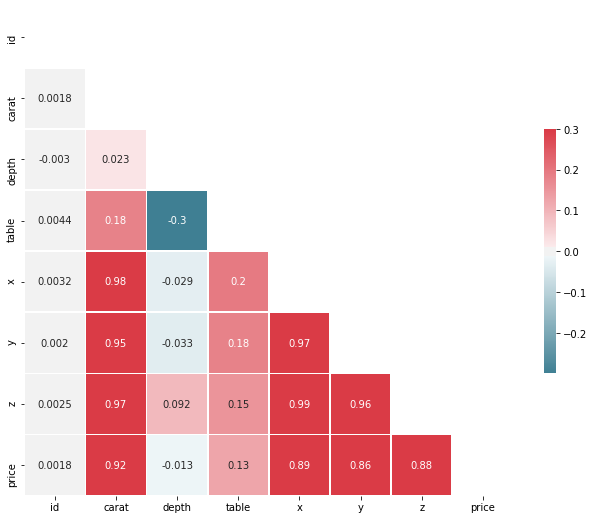

In [3]:
corr = training_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .5}, annot=True);

# Cleaning Data

In [4]:
#diamonds_new = pd.get_dummies(training_df)
#diamonds_new.head()

In [5]:
# List of values from 'cut' column
cuts_column=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
# Replacing all the values in order to get the importance for each value 
for x,y in enumerate(cuts_column):
    print(f"The value '{y}' now is {x}")
    training_df['cut'] = training_df['cut'].replace(y, x)

The value 'Fair' now is 0
The value 'Good' now is 1
The value 'Very Good' now is 2
The value 'Premium' now is 3
The value 'Ideal' now is 4


In [6]:
X = diamonds_new.drop(columns=['id','carat', 'depth', 'table','price'])
y = diamonds_new['price']

NameError: name 'diamonds_new' is not defined

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=300, max_depth=30)

In [ ]:
rf_reg.fit(X_train1, y_train1)

In [ ]:
#variables más importantes
#rf_reg.feature_importances_

In [ ]:
print(rf_reg.score(X_train1, y_train1))
print(rf_reg.score(X_test1, y_test1))

In [ ]:
print('*** METRIC SUMMARY ***')
print('MSE', mean_squared_error(y_test1, rf_reg.predict(X_test1)))
print('RMSE', np.sqrt(mean_squared_error(y_test1, rf_reg.predict(X_test1))))
print('MSLE', mean_squared_log_error(y_test1, rf_reg.predict(X_test1)))
print('MAE', mean_absolute_error(y_test1, rf_reg.predict(X_test1)))
print('R2', r2_score(y_test1, rf_reg.predict(X_test1)))

### Repetir los pasos con el 100% de los datos

In [ ]:
rf_reg.fit(X, y)

### Importamos el test

In [ ]:
#Importing the csv to Jupyter Notebook
test_df = pd.read_csv("../input/diamonds-datamad0120/diamonds_test.csv")
test_df.head()

### Repetir la limpieza que hemos hecho antes de entrenar el modelo

In [ ]:
X_test = pd.get_dummies(test_df)
X_test.head()

In [ ]:
X_test = X_test.drop(columns=['id','carat', 'depth', 'table'])

In [ ]:
X_test.head()

In [ ]:
Y_pred = rf_reg.predict(X_test)

# Crear nuevo DataFrame

In [ ]:
last_file = pd.DataFrame()
last_file['id'] = test_df['id']

In [ ]:
last_file['price'] = pd.Series(Y_pred)

In [ ]:
last_file.to_csv('predictions_random_forest.csv',index = False)